<a href="https://colab.research.google.com/github/muhammadnouman911/GAN-Practice-code/blob/main/GAN_(MNIST).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.datasets import mnist
(x_train, _), (_, _) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x_train = x_train / 127.5 -1.0
x_train = x_train.reshape(-1, 28 , 28 ,1 )

In [ ]:
x_train.shape

(60000, 28, 28, 1)

Generator

In [ ]:
generator = tf.keras.Sequential([
    tf.keras.layers.Dense(7*7*256, input_shape=(100,)),
    tf.keras.layers.Reshape((7,7,256)),
    tf.keras.layers.Conv2DTranspose(128, (5,5), strides=(1,1), padding='same', activation='relu'),
    tf.keras.layers.Conv2DTranspose(64, (5,5), strides=(2,2), padding='same', activation='relu'),
    tf.keras.layers.Conv2DTranspose(1, (5,5), strides=(2,2), padding='same', activation='tanh'),
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Discrimnator

In [ ]:
discriminator = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (5,5), strides=(2,2), padding='same', input_shape=[28,28,1]),
    tf.keras.layers.LeakyReLU(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(128, (5,5), strides=(2,2), padding='same'),
    tf.keras.layers.LeakyReLU(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1 , activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=False)
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

In [ ]:
@tf.function
def train_step(images):
    batch_size = images.shape[0]
    noise = tf.random.normal([BATCH_SIZE, 100])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)

        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        gen_loss = cross_entropy(tf.ones_like(fake_output), fake_output)
        disc_loss_real = cross_entropy(tf.ones_like(real_output), real_output)
        disc_loss_fake = cross_entropy(tf.zeros_like(fake_output), fake_output)
        disc_loss = disc_loss_real + disc_loss_fake

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

In [ ]:
EPOCHS = 50
BATCH_SIZE = 128
train_dataset = tf.data.Dataset.from_tensor_slices(x_train).shuffle(60000).batch(BATCH_SIZE)

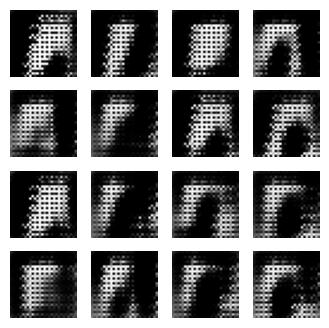

Epoch 1 / 50 completed


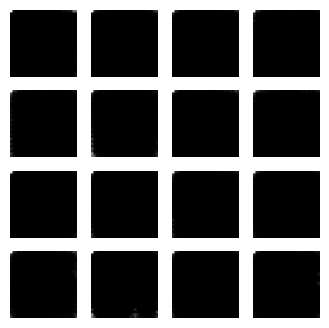

Epoch 2 / 50 completed


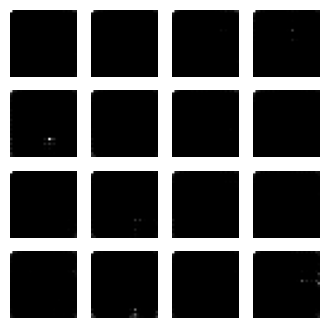

Epoch 3 / 50 completed


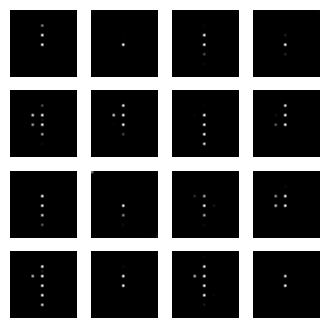

Epoch 4 / 50 completed


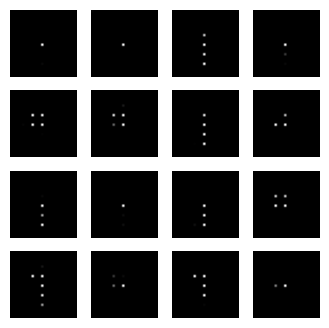

Epoch 5 / 50 completed


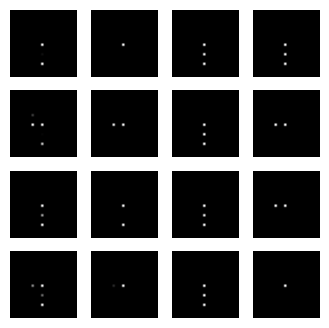

Epoch 6 / 50 completed


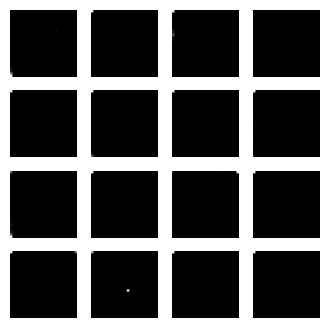

Epoch 7 / 50 completed


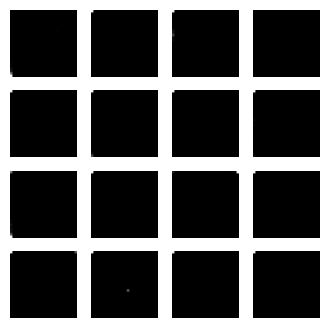

Epoch 8 / 50 completed


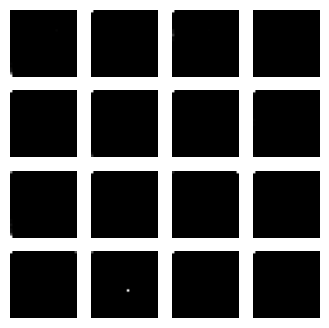

Epoch 9 / 50 completed


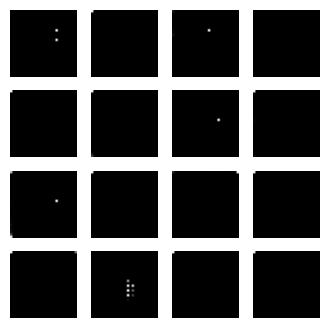

Epoch 10 / 50 completed


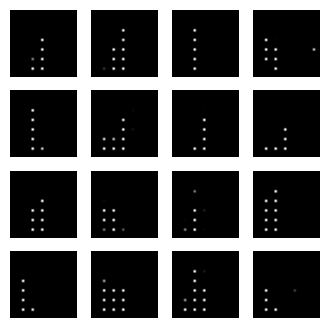

Epoch 11 / 50 completed


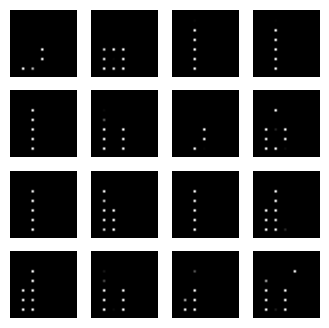

Epoch 12 / 50 completed


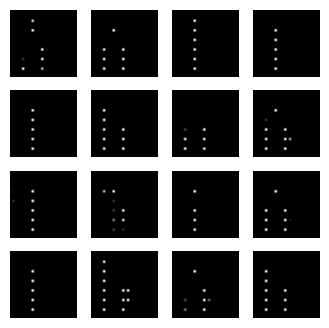

Epoch 13 / 50 completed


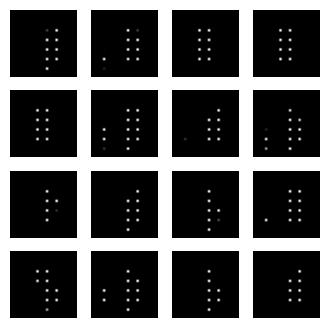

Epoch 14 / 50 completed


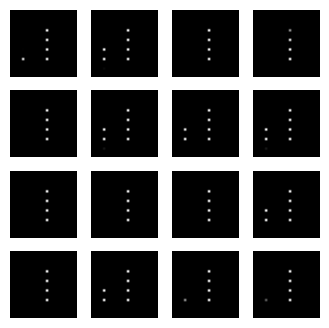

Epoch 15 / 50 completed


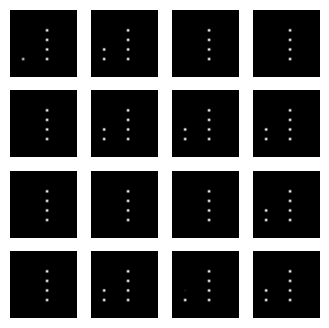

Epoch 16 / 50 completed


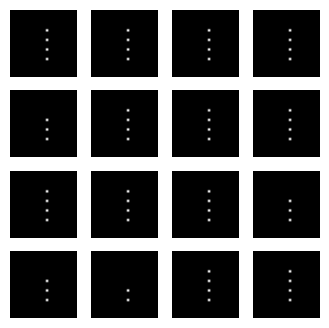

Epoch 17 / 50 completed


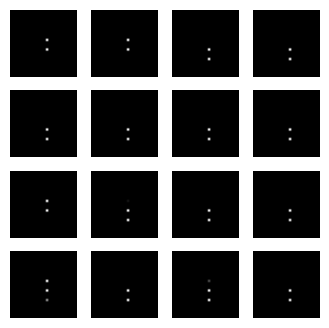

Epoch 18 / 50 completed


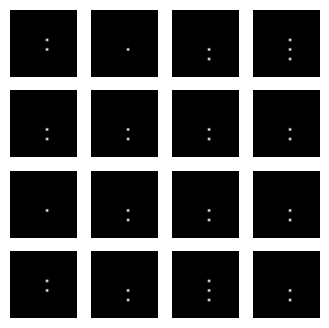

Epoch 19 / 50 completed


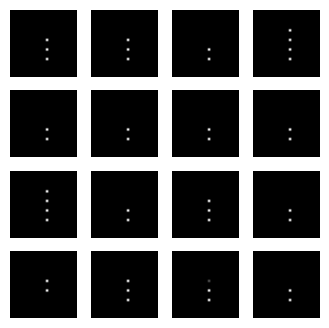

Epoch 20 / 50 completed


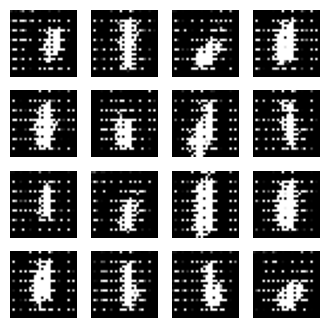

Epoch 21 / 50 completed


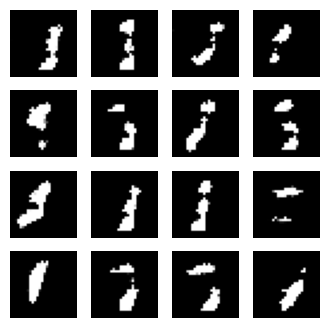

Epoch 22 / 50 completed


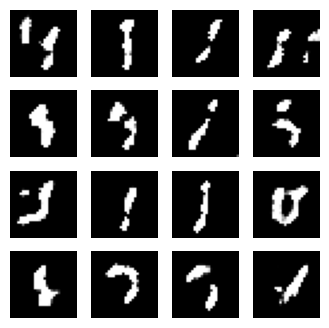

Epoch 23 / 50 completed


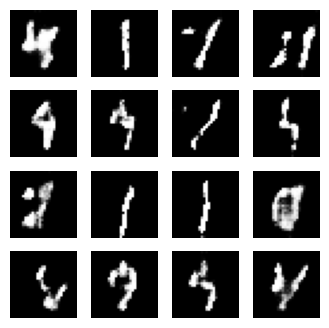

Epoch 24 / 50 completed


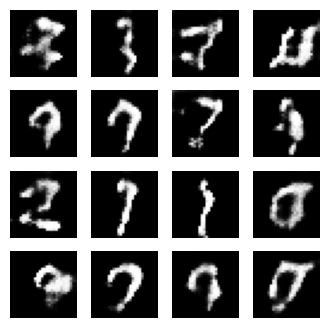

Epoch 25 / 50 completed


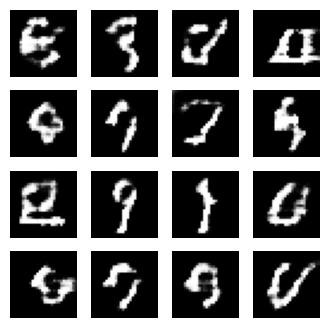

Epoch 26 / 50 completed


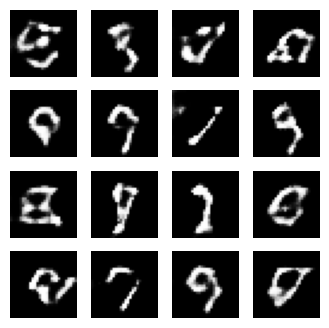

Epoch 27 / 50 completed


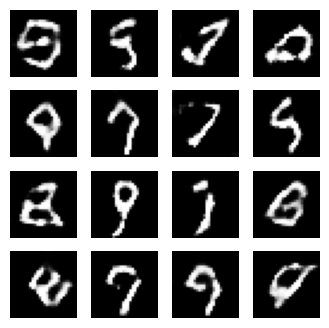

Epoch 28 / 50 completed


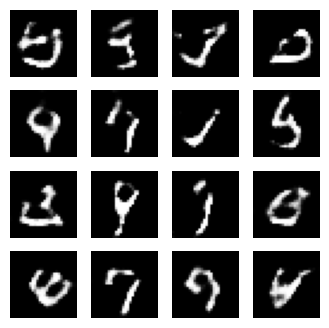

Epoch 29 / 50 completed


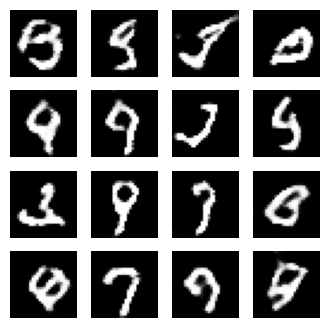

Epoch 30 / 50 completed


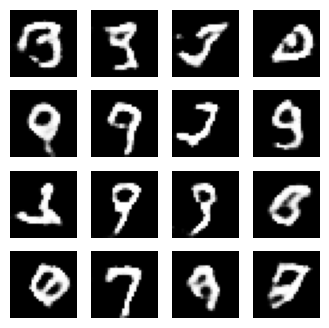

Epoch 31 / 50 completed


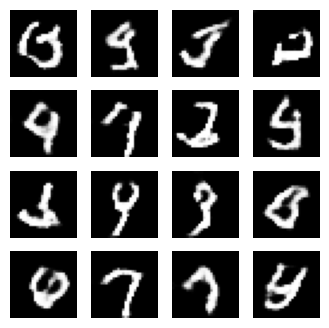

Epoch 32 / 50 completed


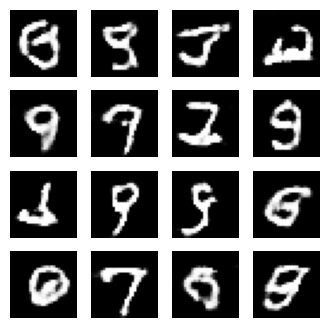

Epoch 33 / 50 completed


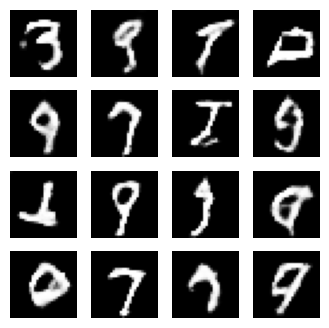

Epoch 34 / 50 completed


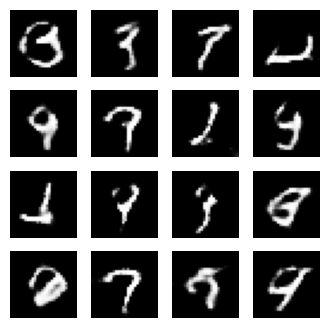

Epoch 35 / 50 completed


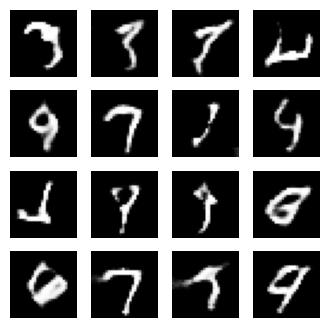

Epoch 36 / 50 completed


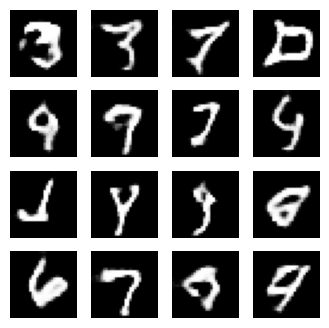

Epoch 37 / 50 completed


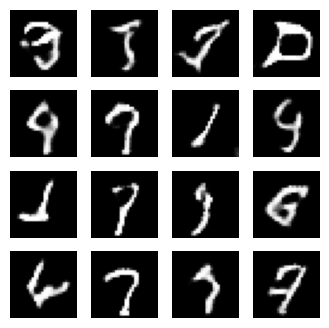

Epoch 38 / 50 completed


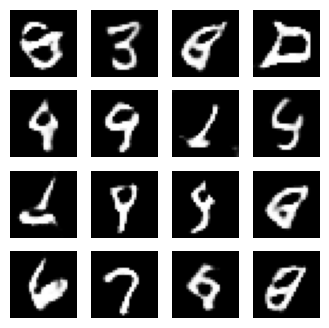

Epoch 39 / 50 completed


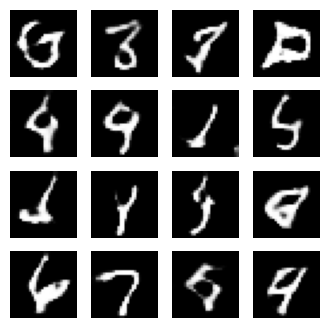

Epoch 40 / 50 completed


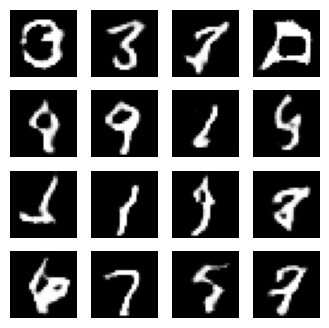

Epoch 41 / 50 completed


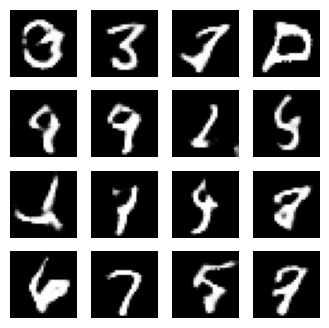

Epoch 42 / 50 completed


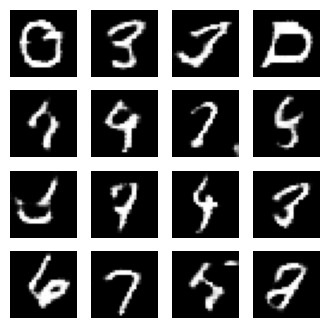

Epoch 43 / 50 completed


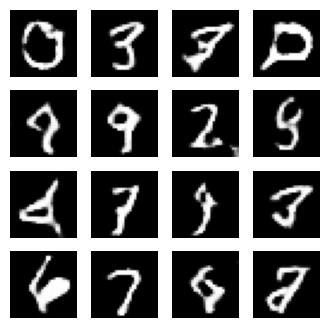

Epoch 44 / 50 completed


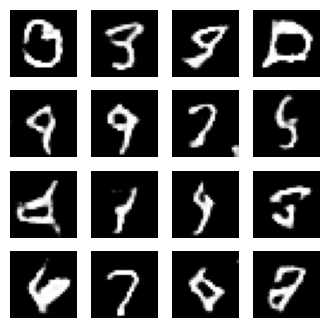

Epoch 45 / 50 completed


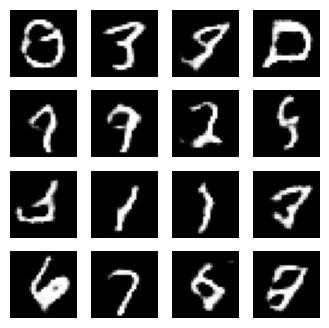

Epoch 46 / 50 completed


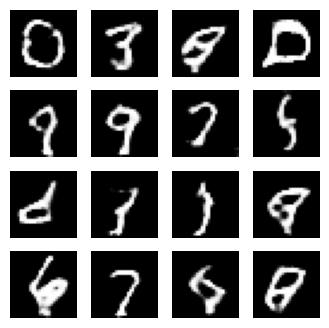

Epoch 47 / 50 completed


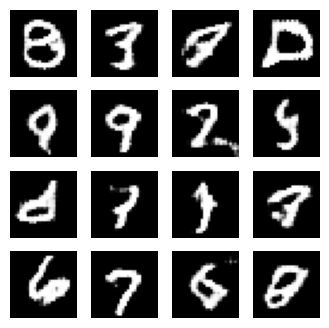

Epoch 48 / 50 completed


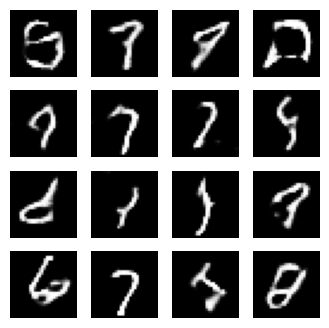

Epoch 49 / 50 completed


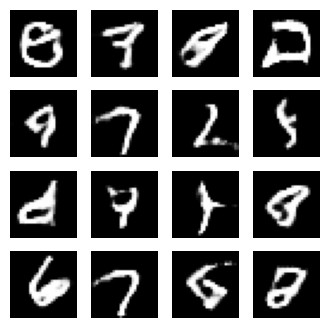

Epoch 50 / 50 completed


In [ ]:
seed = tf.random.normal([16,100])

def generator_images(model , epoch):
  predictions = model(seed, training=False)
  fig = plt.figure(figsize=(4,4))
  for i in range(predictions.shape[0]):
      plt.subplot(4, 4, i+1)
      plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
      plt.axis('off')
  plt.show()

for epoch in range(EPOCHS):
    for batch in train_dataset:
        train_step(batch)
    generator_images(generator , epoch)
    print(f'Epoch {epoch+1} / {EPOCHS} completed')

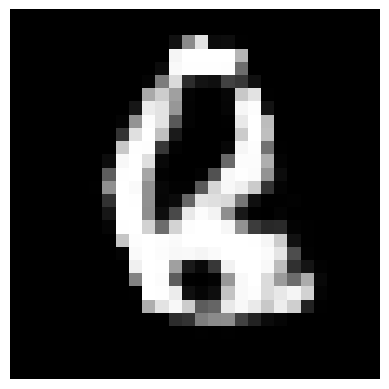

In [ ]:
noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)
plt.imshow(generated_image[0, :, :, 0] * 127.5 + 127.5, cmap='gray')
plt.axis('off')
plt.show()